# K Nearest Neighbors - Case Study 

Welcome to the KNN Case Study using Classification

<h3>Import Libraries </h3>
Import pandas,seaborn, and the usual libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data 

Credit Score Dataset

<h3>Get the Data</h3>


In [2]:
df = pd.read_csv('Credit-Score-Dataset.csv').dropna()

In [3]:
df

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High


Check the head of the dataframe.

In [4]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [6]:
df.keys()

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

In [7]:
df.shape

(164, 8)

In [8]:
df.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

checking the missing values

In [9]:
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [10]:
# view summary statistics in numerical variables

round(df.describe(),2)

,Age,Income,Number of Children
count,164.00,164.00,164.00
mean,37.98,83765.24,0.65
std,8.48,32457.31,0.88
min,25.00,25000.00,0.00
25%,30.75,57500.00,0.00
50%,37.00,83750.00,0.00
75%,45.00,105000.00,1.00
max,53.00,162500.00,3.00


In [11]:
# Checking dublicate values
df.duplicated().sum()

62

In [12]:
print(df.drop_duplicates())

     Age  Gender  Income            Education Marital Status  \
0     25  Female   50000    Bachelor's Degree         Single   
1     30    Male  100000      Master's Degree        Married   
2     35  Female   75000            Doctorate        Married   
3     40    Male  125000  High School Diploma         Single   
4     45  Female  100000    Bachelor's Degree        Married   
..   ...     ...     ...                  ...            ...   
130   31    Male   95000            Doctorate         Single   
131   26  Female   55000    Bachelor's Degree        Married   
132   32    Male   85000      Master's Degree         Single   
133   29  Female   68000            Doctorate        Married   
134   34    Male  105000    Bachelor's Degree        Married   

     Number of Children Home Ownership Credit Score  
0                     0         Rented         High  
1                     2          Owned         High  
2                     1          Owned         High  
3              

In [13]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


# EDA-Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an important step in data analysis that involves understanding and visualizing the structure and characteristics of a dataset.
It provides various libraries and tools that can be used for EDA. Here's an example of EDA code in Python using popular libraries like Pandas, Matplotlib, and Seaborn.

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,164.0,37.975610,8.477289,25.0,30.75,37.0,45.0,53.0
Income,164.0,83765.243902,32457.306728,25000.0,57500.00,83750.0,105000.0,162500.0
Number of Children,164.0,0.652439,0.883346,0.0,0.00,0.0,1.0,3.0


In [15]:
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439
std,8.477289,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])
df["Education"]=le.fit_transform(df["Education"])
df["Home Ownership"]=le.fit_transform(df["Home Ownership"])
df["Marital Status"]=le.fit_transform(df["Marital Status"])
df["Credit Score"]=le.fit_transform(df["Credit Score"])


In [18]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,0,50000,1,1,0,1,1
1,30,1,100000,4,0,2,0,1
2,35,0,75000,2,0,1,0,1
3,40,1,125000,3,1,0,0,1
4,45,0,100000,1,0,3,0,1


In [19]:
# Removing outliers
def remove_outliers(df, threshold=3):
    # Calculate z-scores
    z_scores = (df - np.mean(df)) / np.std(df)

    # Identify outliers
    outliers = np.abs(z_scores) > threshold

    # Remove outliers from data
    cleaned_data = df[~outliers]

    return cleaned_data


cleaned_data = remove_outliers(df)
print(cleaned_data)

     Age  Gender  Income  Education  Marital Status  Number of Children  \
0     25       0   50000          1               1                   0   
1     30       1  100000          4               0                   2   
2     35       0   75000          2               0                   1   
3     40       1  125000          3               1                   0   
4     45       0  100000          1               0                   3   
..   ...     ...     ...        ...             ...                 ...   
159   29       0   27500          3               1                   0   
160   34       1   47500          0               1                   0   
161   39       0   62500          1               0                   2   
162   44       1   87500          4               1                   0   
163   49       0   77500          2               0                   1   

     Home Ownership  Credit Score  
0                 1             1  
1                 0        

C:\Users\Dell\AppData\Local\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


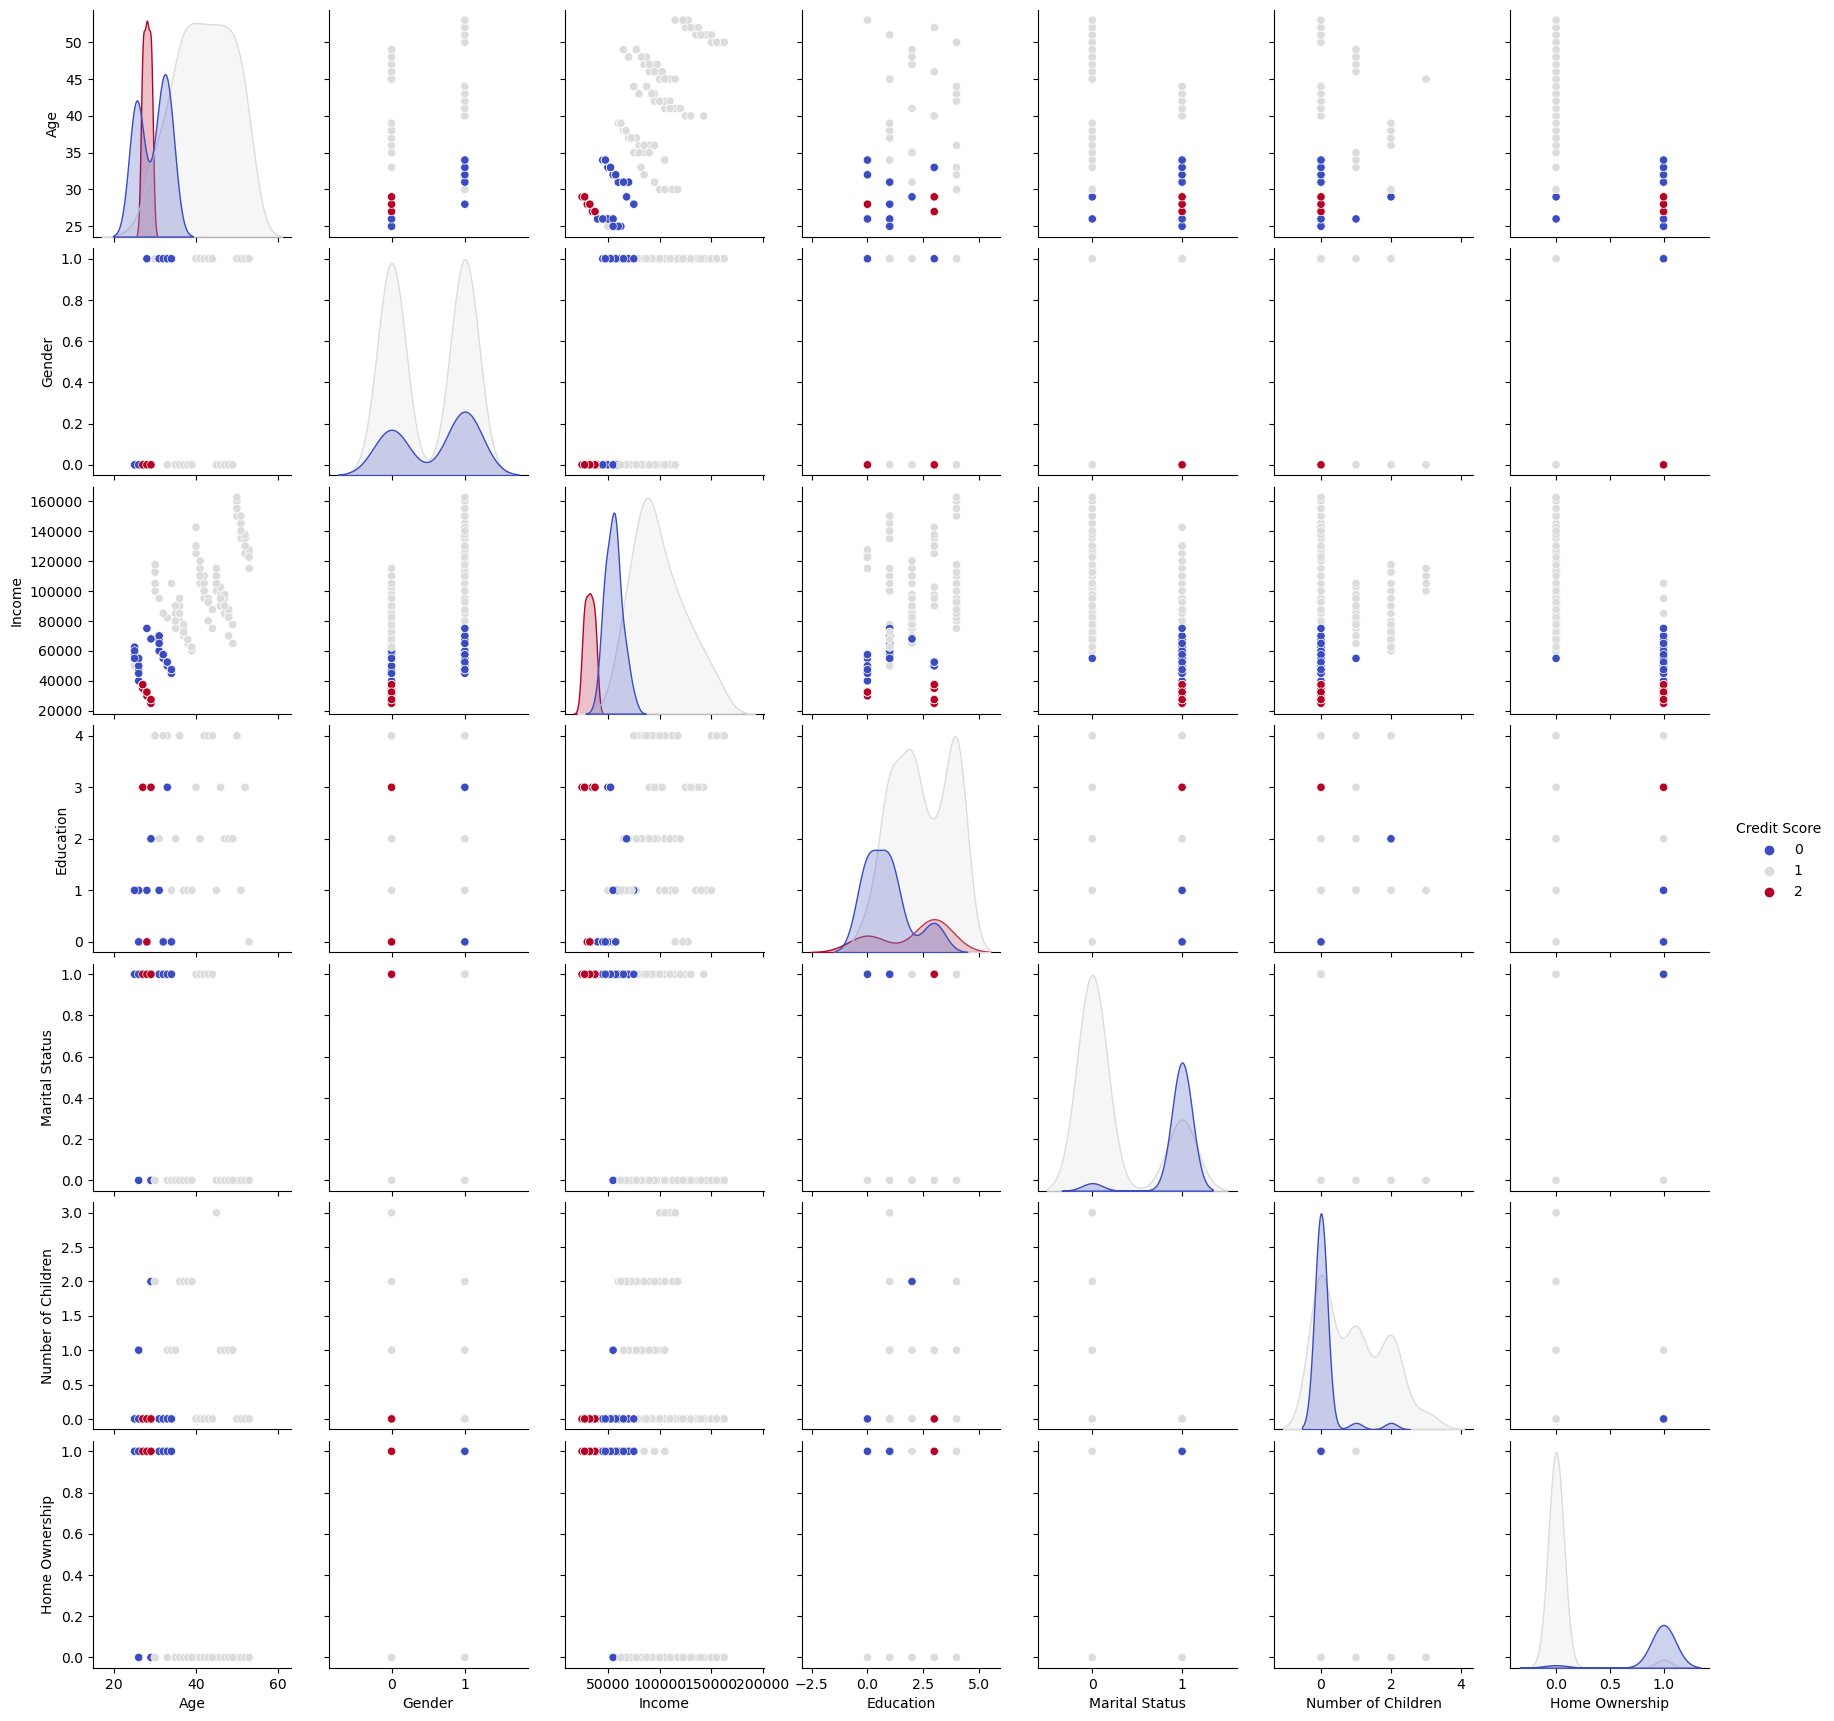

In [20]:
# THIS IS GOING TO BE A VERY LARGE PLOT
sns.pairplot(df,hue='Credit Score',palette='coolwarm')

<Axes: >

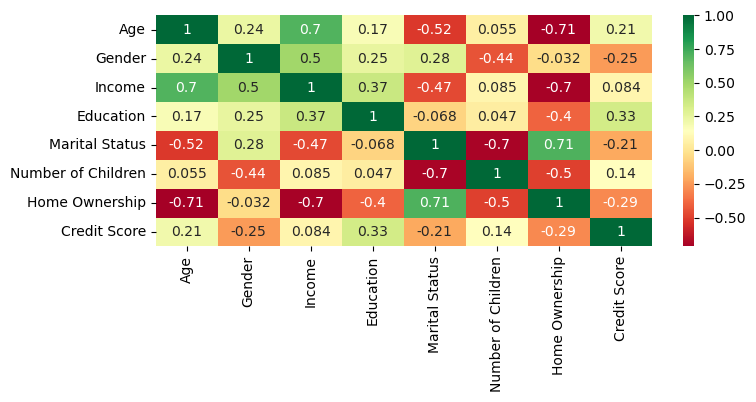

In [21]:
plt.figure(figsize=(8,3))  

sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  

<h3>Standardize the Variables</h3>
Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [23]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [24]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [25]:
scaler.fit(df.drop('Credit Score',axis=1))

StandardScaler()

Use the .transform() method to transform the features to a scaled version

In [26]:
scaled_features = scaler.transform(df.drop('Credit Score',axis=1))

In [28]:
scaled_features

array([[-1.53531997, -0.95235327, -1.04348337, ...,  1.06295349,
        -0.74086152,  1.44718334],
       [-0.94370231,  1.05003052,  0.50172   , ..., -0.94077493,
         1.53019061, -0.69099745],
       [-0.35208465, -0.95235327, -0.27088169, ..., -0.94077493,
         0.39466455, -0.69099745],
       ...,
       [ 0.12120947, -0.95235327, -0.65718253, ..., -0.94077493,
         1.53019061, -0.69099745],
       [ 0.71282713,  1.05003052,  0.11541915, ...,  1.06295349,
        -0.74086152, -0.69099745],
       [ 1.30444478, -0.95235327, -0.19362152, ..., -0.94077493,
         0.39466455, -0.69099745]])

Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.

In [29]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership
0,-1.535320,-0.952353,-1.043483,-0.765074,1.062953,-0.740862,1.447183
1,-0.943702,1.050031,0.501720,1.398238,-0.940775,1.530191,-0.690997
2,-0.352085,-0.952353,-0.270882,-0.043970,-0.940775,0.394665,-0.690997
3,0.239533,1.050031,1.274322,0.677134,1.062953,-0.740862,-0.690997
4,0.831151,-0.952353,0.501720,-0.765074,-0.940775,2.665717,-0.690997


<h3>Train Test Split</h3>
Use train_test_split to split your data into a training set and a testing set.

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Credit Score'],
                                                    test_size=0.30)

# Using KNN
Import KNeighborsClassifier from scikit learn.

In [33]:
from sklearn.neighbors import KNeighborsClassifier

Create a KNN model instance with n_neighbors=1

In [34]:
knn = KNeighborsClassifier(n_neighbors=1)

Fit this KNN model to the training data.

In [35]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

<h3>Use the predict method to predict values using your KNN model and X_test.</h3>

In [36]:
pred = knn.predict(X_test)

** Create a confusion matrix and classification report.**

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(confusion_matrix(y_test,pred))

[[ 9  1  0]
 [ 1 38  0]
 [ 0  0  1]]


In [39]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        39
           2       1.00      1.00      1.00         1

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.*

In [40]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Now create the following plot using the information from your for loop.

Text(0, 0.5, 'Error Rate')

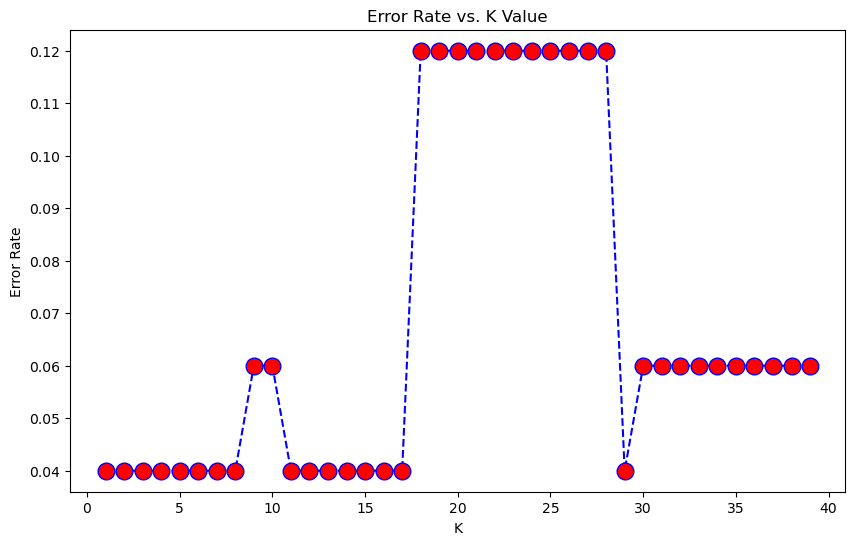

In [41]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=12)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

<h3>Retrain with new K Value</h3>
Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.

In [42]:
# NOW WITH K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[ 9  1  0]
 [ 1 38  0]
 [ 0  0  1]]


              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        39
           2       1.00      1.00      1.00         1

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [45]:
# NOW WITH K=10
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[ 8  1  1]
 [ 1 38  0]
 [ 0  0  1]]


              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.97      0.97      0.97        39
           2       0.50      1.00      0.67         1

    accuracy                           0.94        50
   macro avg       0.79      0.92      0.83        50
weighted avg       0.95      0.94      0.94        50



In [46]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[ 9  1  0]
 [ 1 38  0]
 [ 1  0  0]]


              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.97      0.97      0.97        39
           2       0.00      0.00      0.00         1

    accuracy                           0.94        50
   macro avg       0.60      0.62      0.61        50
weighted avg       0.92      0.94      0.93        50



C:\Users\Dell\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
df["Credit Score"].value_counts()

1    113
0     36
2     15
Name: Credit Score, dtype: int64

# Done!!!!